# 1. Исследование продаж компьютерных игр. Общая информация

- Исследование интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Цель: определить потенциально популярный продукт.
- Данные до 2016 года. Сейчас декабрь 2016 г., планирование кампании на 2017-й.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
import seaborn as sns



In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Два пропуска в столбце Name, объективно ни на что не повлияют.
Пропуски в столбце с годом релиза. Также надо изменить тип данных. 
Пропуски в critic_score, user_score и rating. 
Надо изменить тип данных в user_score.
Одной из причин пропусков в critic_score, user_score и rating являются временные рамки, индустрия только начала развиваться, логично предположить, что для многих игр нет оценок. Такэе в условии сказано, что данные за 2016 год неполные. К тому же, ESRB была основана лишь в 1994 году.

# 2. Подготовка данных 

Задачи по условию проекта: заменить названия столбцов (приведите к нижнему регистру)и посчитать суммарные продажи во всех регионах.

In [5]:
games.columns = games.columns.str.lower()

Во-первых, удалим пропуски стобца с названием. Преобразуем тип данных в столбце с годом выхода, а также удалим пропуски. Их мало, что видно без дополнительных расчетов. 

In [6]:
games = games.dropna(subset=['name']).reset_index(drop=True)

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [8]:
games.dropna(subset=['year_of_release'], inplace=True)

In [9]:
games['year_of_release'].isna().sum()

0

В колонке rating заменим пропуски на "неизвестно", логически будет верно, к тому же, это не числовое значение.

In [10]:
games['rating'] = games['rating'].fillna('unknown')

In [11]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


Колонка user_score содержит много пропусков, а также tbd, расшифровывается tbd - "to be determined", то есть оценка еще не определена, заменим на nan. По факту никакой оценки на данный момент еще нет. 

In [12]:
games.loc[games['user_score']=="tbd", 'user_score']=np.nan
games['user_score'] = games['user_score'].astype(float)
games['user_score'].dtype

dtype('float64')

Добавим колонку с общими продажами.

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


Теперь данные готовы. Удалили пропуски в колонках с названием и годом выхода. Преобразовали данные 'user_score'. Добавили колонку с суммарными продажами. Преобразовали названия всех колонок. Пропуски в critic_score оставим так, заполнять их нелогично.  

# 3. Исследовательский анализ данных

    Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    Найти актуальный период. 
    Какие платформы лидируют по продажам, растут или падают? 
    Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    Ккак влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
    Соотнести выводы с продажами игр на других платформах.
    Посмотреть на общее распределение игр по жанрам. 

In [14]:
games_per_year = games.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')


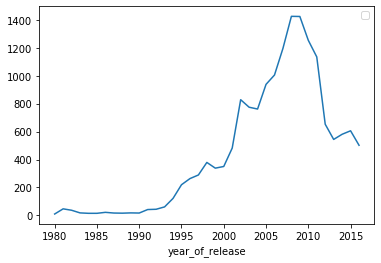

In [15]:
sns.lineplot(data = games_per_year)
plt.legend('')

Количество игр начало быстро расти в середине 90-х, после 2000 можно наблюдать резкий скачок вплоть до 2009 года, распростраение интернета, активное распространение домашних компьютеров, появление смартфонов, общее развитие и доступность индустрии игр является причиной появления большого количества игр. Также мы наблюдаем снижение ажиотажа после 2009 года. 

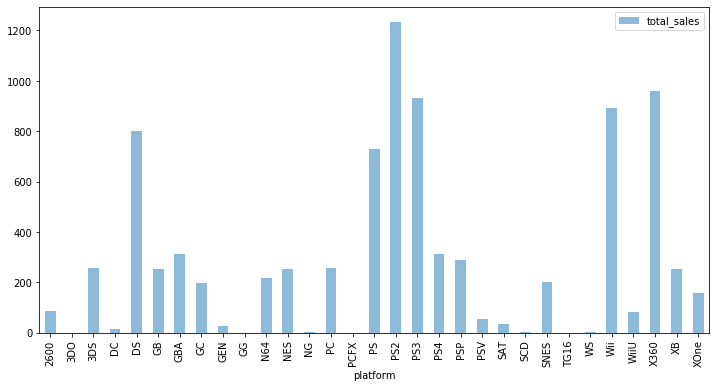

In [16]:

pl_sales = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
pl_sales.plot.bar(figsize=(12,6), alpha=0.5)





In [17]:
min_sales = 5 
avg_years = games.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @min_sales')
avg_years.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean()

year_of_release    6.916667
dtype: float64

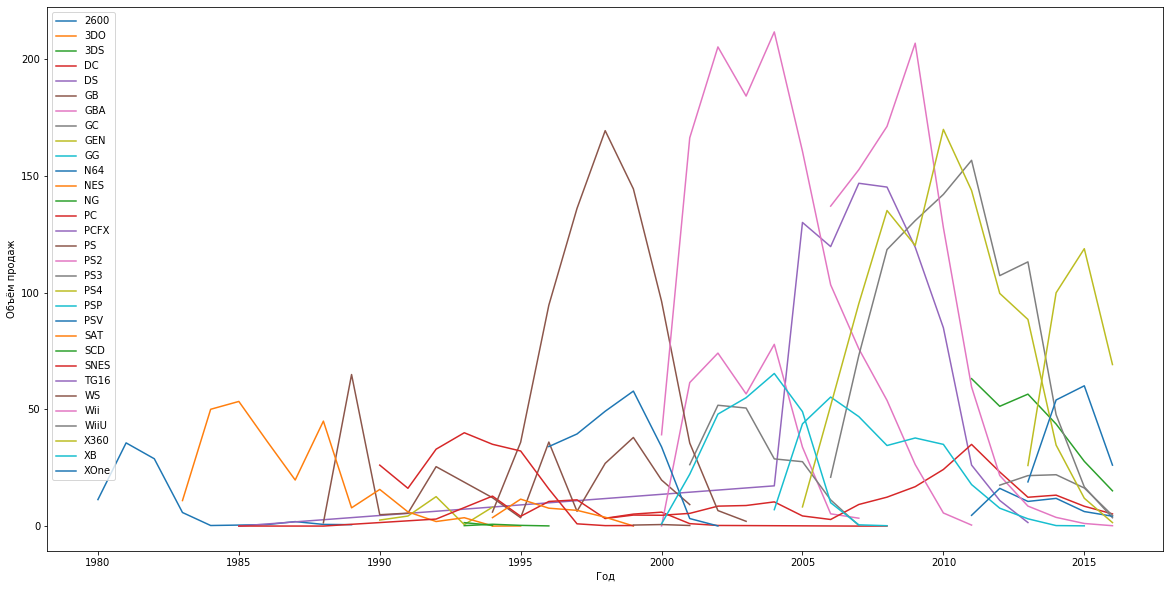

In [18]:
plt.figure(figsize=(20,10))
for platform,group_data in games.groupby('platform'):
    plt.plot(games.query('platform == @platform').groupby('year_of_release')['total_sales'].sum(),label=platform)
plt.xlabel('Год')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show()

Пять платформ с самыми большими продажами за все время: PS2, X360, PS3, Wii, DS;
Если взять платформы с продажами больше 5, то получим, что средний срок жизни платформы составляет около 7 лет.

Выделим актуальный период для дальнейшего исследования. Обращаясь к графику количества игр по годам, а также, если учесть, что средний срок жизни составляет 7 лет, то было решено взять рынок после 2013 года. 
Во-первых, стих ажиотаж после выпуска огромного количества игр на рынок, и судя по графику после 2013 количество выпускаемых игр достаточно стабильно. Также у нас ланные за 2016 год еще неполные. 
Основной причиной для выбора 2013 года стал средний срок жизни платформы. Также появились в 2013 году: Xbox One и PlayStation 4. И в 2011 год вышла в свет Wii U. В 2013 была прекращена поддержка Wii. 

In [19]:
actual_games = games.query('year_of_release > 2013')
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [20]:
pl_sales_act = actual_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales')
pl_sales_act 

,total_sales
platform,
PSP,0.36
Wii,5.07
PSV,22.40
PC,27.05
WiiU,42.98
X360,48.22
PS3,68.18
3DS,86.68
XOne,140.36


Самые успешные по продажам платформы после 2013 года: PS4, XOne, 3DS, PS3, X360. Между PS4, XOne и остальными наблюдается большой разрыв.

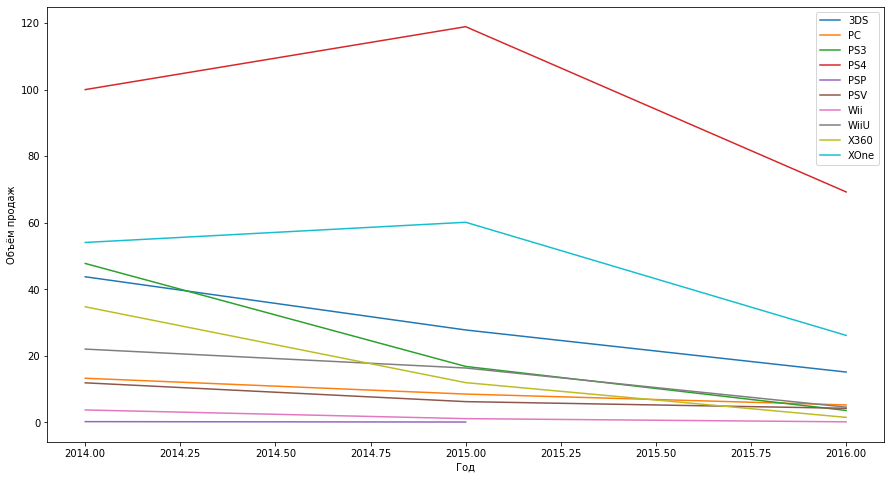

In [21]:
plt.figure(figsize=(15,8))
for platform,group_data in actual_games.groupby('platform'):
    plt.plot(actual_games.query('platform == @platform').groupby('year_of_release')['total_sales'].sum(),label=platform)
plt.xlabel('Год')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2)

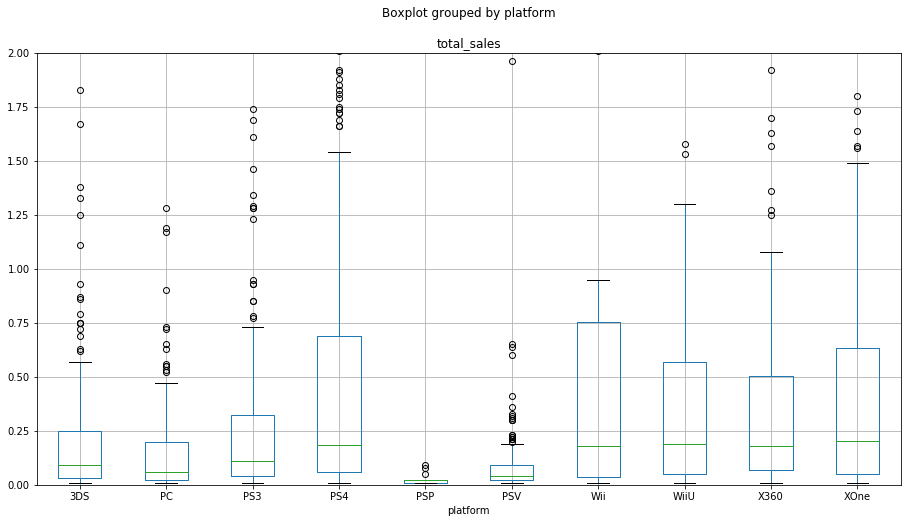

In [22]:
actual_games.boxplot(column='total_sales', by='platform', figsize=(15,8))
plt.ylim(0,2)

- В первую очередь, стоит обратить на две новые платформы, которые появились в 2013 году: Xbox One и PlayStation 4. Хоть их продажи к 2016 году снизились, однако это все ещё две самые продаваемые платформы. Также они достаточно новые, поэтому тх смены на новое поколение пока не предвидется. 
- Касательно Xbox 360, в апреле 2016 года объявлено о перкращении их производства. Дальнейшие инвестиции в данную платформу бесполезны. Также можем наблюдать низкие продажи после 2013 года.
- PlayStation 3 существовала в одном временном промежутке с Xbox 360, однако о прекращении ее производства ещё не было объявлено. Но мы видим развитие PlayStation 4, и стремительное падение продаж PlayStation 3. 
- Отличное от других поведение показывала консоль Wii U. Однако она выпущена в 2011 году, продажи ее упали, можно предположить, что стоит ожидать выхода новой версии и прекращения производства текущей. 


,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


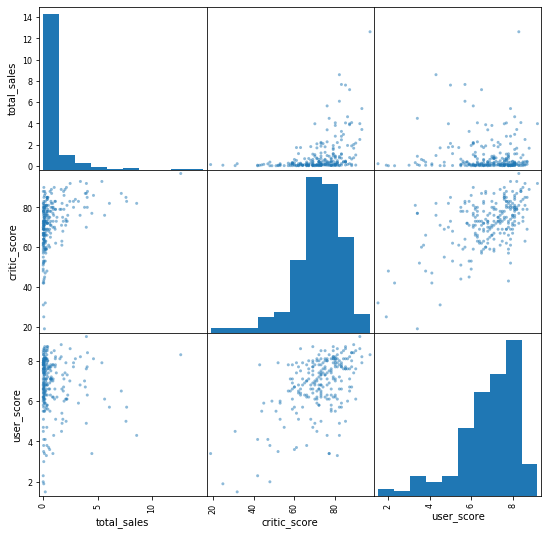

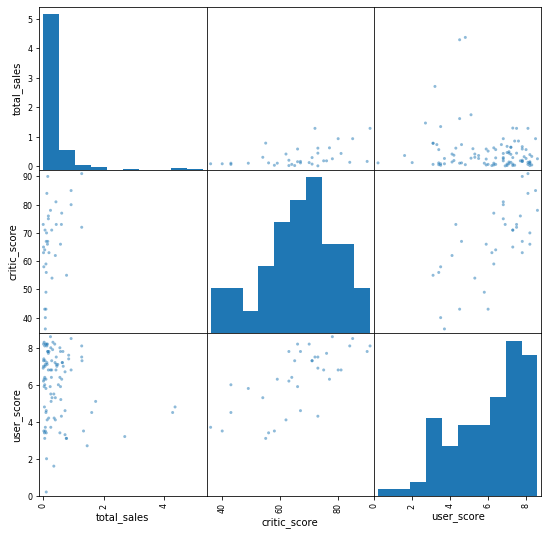

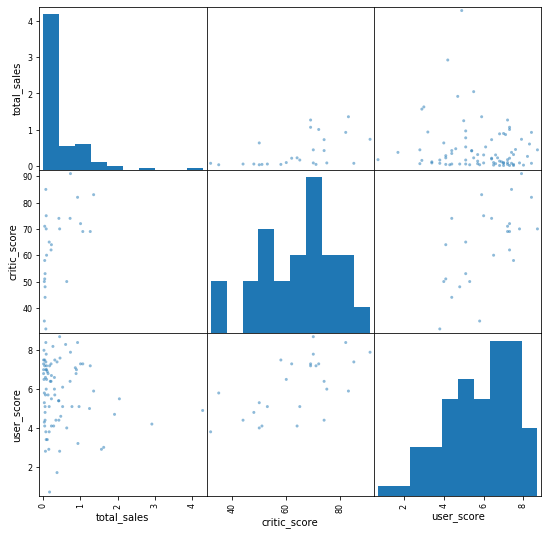

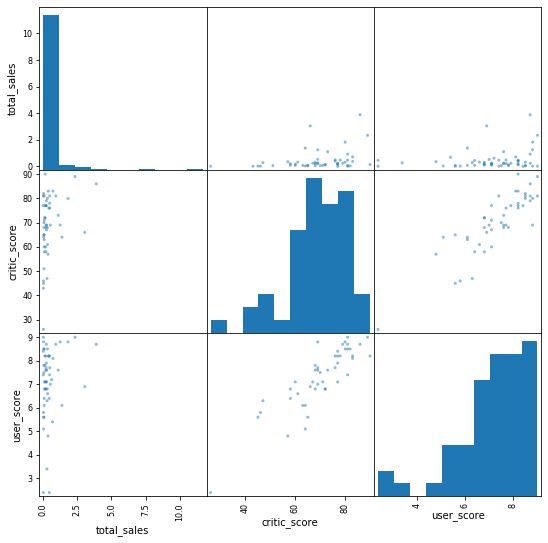

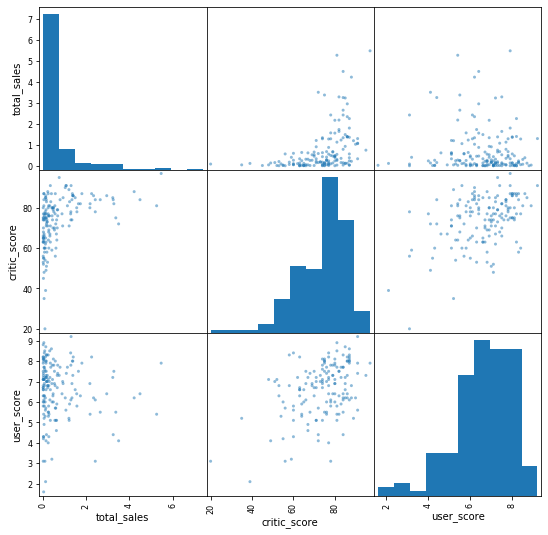

In [23]:
sales_platform = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
for platf in sales_platform:
    display(actual_games.query('platform==@platf')[['total_sales','critic_score','user_score']].corr())
    pd.plotting.scatter_matrix(actual_games.query('platform==@platf')[['total_sales','critic_score','user_score']], figsize=(9, 9))

Корреляции между продажами и отзывами критиков, продажами и отзывами пользователей не наблюдается. Делаем вывод, что линейной зависимости нет. Ближе всего к показателю 0,5 корреляция продаж и отзывами критиков у платформы 'XOne'.

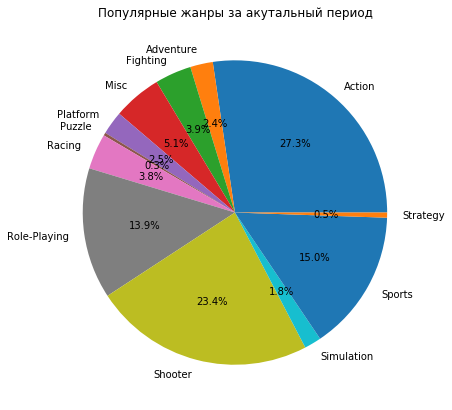

In [24]:
x=actual_games.groupby("genre")['total_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Популярные жанры за акутальный период')
plt.show()




Самые популярные жанры после 2013 года: action, shooter, sports, role-playing, misc.

Общие выводы:

- Количество игр начало быстро расти в середине 90-х, после 2000 можно наблюдать резкий скачок вплоть до 2009 года, также мы наблюдаем снижение ажиотажа после 2009 года
- Средний срок жизни платформы составляет около 7 лет
- Самые успешные по продажам платформы после 2013 года: PS4, XOne 
- Наиболее перспективные платформы: Xbox One и PlayStation 4
- Корреляции между продажами и отзывами критиков, продажами и отзывами пользователей не наблюдается
- Самые популярные жанры после 2013 года: action, shooter, sports, role-playing, misc


# 4. Портрет пользователя каждого региона

    Самые популярные платформы (топ-5). 
    Самые популярные жанры (топ-5). 
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

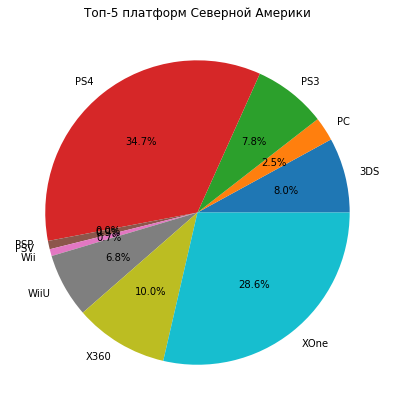

In [25]:
x=actual_games.groupby("platform")['na_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 платформ Северной Америки')
plt.show()





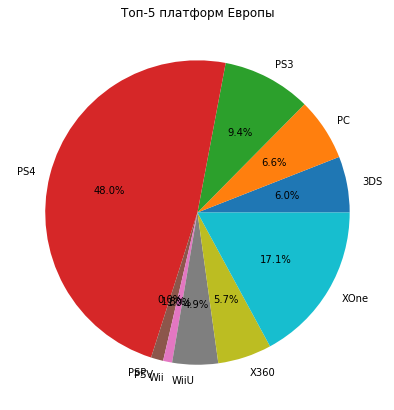

In [26]:
x=actual_games.groupby("platform")['eu_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 платформ Европы')
plt.show()

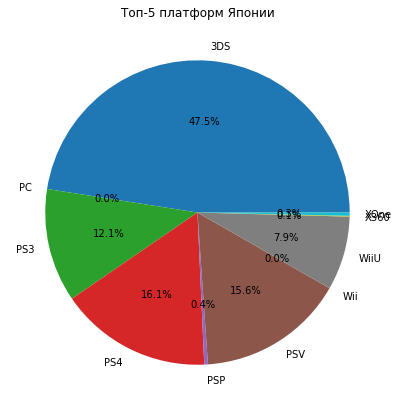

In [27]:
x=actual_games.groupby("platform")['jp_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 платформ Японии')
plt.show()

- Самые популярная платформа в Северной Америке: PS4, на втором месте XOne
- Самые популярная платформа в Европе: PS4, на втором месте XOne
- Самые популярная платформа в Японии: 3DS, на втором месте PS4

Разница в популярности той или иной платформы по регионам имеет огромное количество причин. Японский рынок в любой сфере всегда отличается от мирового, будь то игры, музыка и другие аспекты. У Японии много своих отличительных черт, система оплаты, авторские права и другое. Рынки Европы и Америки также имеют отличия, но думаю, тут разница в популярности также по большей части зависит от маркетинга самих компаний и набора эксклюзивных игр.




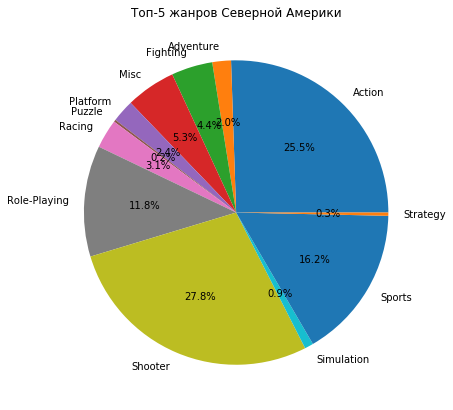

In [28]:
x=actual_games.groupby("genre")['na_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 жанров Северной Америки')
plt.show()



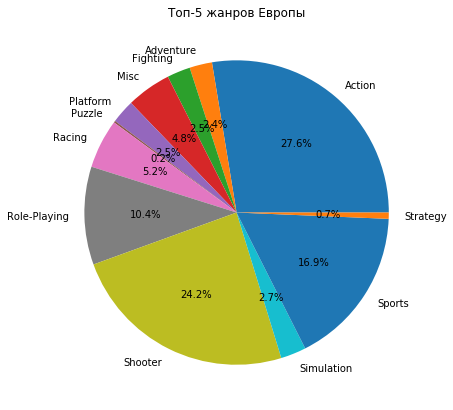

In [29]:
x=actual_games.groupby("genre")['eu_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 жанров Европы')
plt.show()


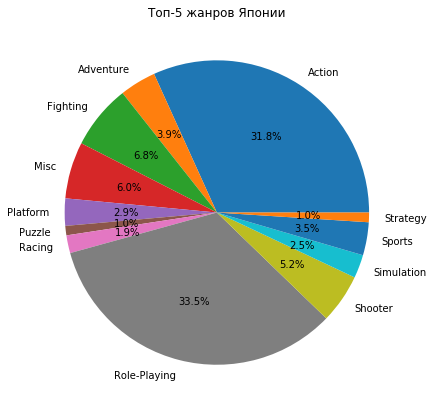

In [30]:
x=actual_games.groupby("genre")['jp_sales'].sum()
genres = x.index
plt.figure(figsize=(15,7))
plt.pie(x=x, labels=genres, autopct='%1.1f%%')
plt.title('Топ-5 жанров Японии')
plt.show()

- Самые популярный жанр в Северной Америке: Shooter, на втором месте Action
- Самые популярный жанр в Европе: Action, на втором месте Shooter
- Самые популярный жанр в Японии: Role-Playing, на втором месте Action
    
Разница в популярности жанров, предполагаю, в этом случае можно говорить о разнице в личных предпочтениях японцеы и людей с запада. Объективные различия менталитетов запада и востока.

In [31]:
rating_sales = actual_games.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales',ascending=False).reset_index()
rating_sales


,rating,na_sales,eu_sales,jp_sales
0,M,96.42,93.44,8.01
1,unknown,64.72,58.95,56.90
2,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
4,E10+,33.23,26.16,4.46


Для справки по рейтингам:
- «M» («Mature») — «Для взрослых»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»

Самые продаваемые игры в Европе и Северной Америке имеют рейтинг «M» («Mature»). В Японии больше всего продаются игры с неизвестным рейтингом. Стоит учесть, что в Японии существует Computer Entertainment Rating Organization, которая занимается присуждением рейтинга играм для продажи в Японии. 


 Общие выводы: 
 
 - Северная Америка: Самые популярная платформа - PS4, самый популярный жанр - Shooter, самый продаваемый рейтинг - «M» («Mature»)
 - Европа: Самые популярная платформа - PS4, самый популярный жанр - Action, самый продаваемый рейтинг - «M» («Mature»)
 - Япония: Самые популярная платформа - 3DS, самый популярный жанр - Role-Playing, самый продаваемый рейтинг - unknown


# 5. Проверка гипотез

Первая гипотеза и альтернативная к ней:

    H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [32]:
xone = actual_games[(actual_games['platform']=='XOne')]
pc = actual_games[(actual_games['platform']=='PC')]

alpha = .05

results = st.ttest_ind(xone['user_score'].dropna(), pc['user_score'].dropna())

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Исходя из данных по средним пользовательским рейтингам Xbox One и PC, не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC практически одинаковые.


Вторая гипотеза (добавляем альтернативную):

    H₀ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
    H₁ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [33]:
action = actual_games[(actual_games['genre']=='Action')]
sports = actual_games[(actual_games['genre']=='Sports')]

alpha = .05

results = st.ttest_ind(action['user_score'].dropna(), sports['user_score'].dropna())

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Исходя по получившемуся p-значению, мы отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») с большой вероятностью будут разными.

Мы провели исследование данных о продажах компьютерных игр, оценок пользователей и экспертов, жанров и платформ. В ходе анализа мы получили следующие выводы: 

- Количество игр начало быстро расти в середине 90-х, после 2000 можно наблюдать резкий скачок вплоть до 2009 года, также мы наблюдаем снижение ажиотажа после 2009 года
- Средний срок жизни платформы составляет около 7 лет
- Пять платформ с самыми большими продажами за все время: PS2, X360, PS3, Wii, DS
- Самые успешные по продажам платформы после 2013 года: PS4, XOne 
- Корреляции между продажами и отзывами критиков, продажами и отзывами пользователей не наблюдается
- Самые популярные жанры после 2013 года: action, shooter, sports, role-playing, misc
- Северная Америка: Самые популярная платформа - PS4, самый популярный жанр - Shooter, самый продаваемый рейтинг - «M» («Mature»)
- Европа: Самые популярная платформа - PS4, самый популярный жанр - Action, самый продаваемый рейтинг - «M» («Mature»)
- Япония: Самые популярная платформа - 3DS, самый популярный жанр - Role-Playing, самый продаваемый рейтинг - unknown
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются

Делая вывод, можно сказать, что наиболее перспективные платформы: Xbox One и PlayStation 4. Они относительно новые, выхода новых версий от тех же компаний пока не предвидется. Остальные платформы уже отжили свой срок и упали по продажам, скорее всего, их компании выпустят новые консоли. Также Xbox One и PlayStation 4 популярны в Северной Америке и Европе и охватят оба рынка. В Японии ситуация немного отличается, при этом PlayStation все же входит в топ популярных платформ в Японии. Что касается популярной в Японии Nintendo 3DS, вкладываться в 2017 году в нее не стоит, так как можно ждать новых устройств от Nintendо. 